<a href="https://colab.research.google.com/github/4gzjw4dq7h-coder/blank-app/blob/main/Kopie_von_SDRIS_Particle_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:34: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:34: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-703983866.py:34: SyntaxWarning: invalid escape sequence '\l'
  ax1.set_ylabel('Ontologische Spannung ($\lambda$)', color='black')
/tmp/ipython-input-703983866.py:35: SyntaxWarning: invalid escape sequence '\l'
  line1 = ax1.plot(dimensions, tensions, 'o-', color='black', label='SDRIS Tension $\lambda_{max}$', linewidth=2)


Plot erstellt: sdris_particle_hierarchy.png


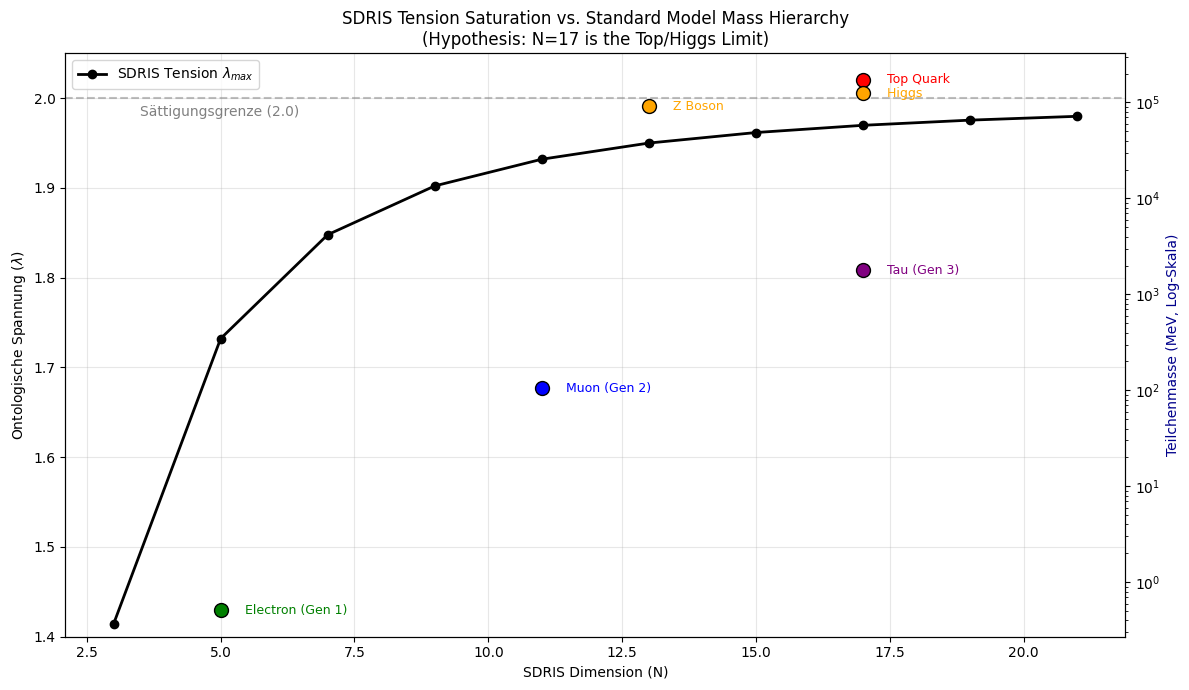

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

def get_sdris_tension(n):
    """
    Berechnet die maximale ontologische Spannung (Eigenwert)
    für die Tilt-Matrix der Dimension N (ungerade = Flux Tunnel).
    Formel: lambda_max = 2 * cos(pi / (N + 1))
    """
    # Analytische Lösung für die tridiagonale Matrix (Flux Tunnel)
    return 2 * np.cos(np.pi / (n + 1))

def plot_correlation():
    # --- 1. SDRIS Daten generieren ---
    dimensions = np.arange(3, 22, 2) # Nur ungerade Dimensionen (Flux Tunnels)
    tensions = [get_sdris_tension(n) for n in dimensions]

    # --- 2. Standard Modell Daten (Massen in MeV) ---
    # Wir gruppieren sie nach Generationen, um die Korrelation zu prüfen
    particles = {
        "Electron (Gen 1)": {"mass": 0.511, "color": "green", "dim_guess": 5},
        "Muon (Gen 2)":     {"mass": 105.66, "color": "blue", "dim_guess": 11},
        "Tau (Gen 3)":      {"mass": 1776.8, "color": "purple", "dim_guess": 17},
        "Top Quark":        {"mass": 173000, "color": "red", "dim_guess": 17}, # Schwerstes Teilchen
        "Higgs":            {"mass": 125100, "color": "orange", "dim_guess": 17},
        "Z Boson":          {"mass": 91187,  "color": "orange", "dim_guess": 13}
    }

    fig, ax1 = plt.subplots(figsize=(12, 7))

    # --- Plot 1: Die SDRIS Sättigungskurve (Linke Y-Achse) ---
    ax1.set_xlabel('SDRIS Dimension (N)')
    ax1.set_ylabel('Ontologische Spannung ($\lambda$)', color='black')
    line1 = ax1.plot(dimensions, tensions, 'o-', color='black', label='SDRIS Tension $\lambda_{max}$', linewidth=2)
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.set_ylim(1.4, 2.05) # Fokus auf den relevanten Bereich
    ax1.grid(True, alpha=0.3)

    # Markiere die Sättigung
    ax1.axhline(y=2.0, color='grey', linestyle='--', alpha=0.5)
    ax1.text(3.5, 1.98, "Sättigungsgrenze (2.0)", color='grey')

    # --- Plot 2: Teilchenmassen (Rechte Y-Achse, Logarithmisch) ---
    ax2 = ax1.twinx()  # Zweite Y-Achse
    ax2.set_ylabel('Teilchenmasse (MeV, Log-Skala)', color='darkblue')
    ax2.set_yscale('log')

    # Plotte die Teilchen an ihren vermuteten Dimensionen
    for name, data in particles.items():
        dim = data["dim_guess"]
        mass = data["mass"]
        ax2.scatter(dim, mass, color=data["color"], s=100, edgecolors='black', zorder=10)
        ax2.text(dim + 0.3, mass, f"  {name}", verticalalignment='center', fontsize=9, color=data["color"])

    # Verbindungslinien für die Hypothese
    # Wir zeigen, wie die "Stufen" in der Spannung mit den "Stufen" in der Masse korrelieren

    plt.title('SDRIS Tension Saturation vs. Standard Model Mass Hierarchy\n(Hypothesis: N=17 is the Top/Higgs Limit)')

    # Legende
    lines, labels = ax1.get_legend_handles_labels()
    ax1.legend(lines, labels, loc='upper left')

    plt.tight_layout()
    plt.savefig("sdris_particle_hierarchy.png", dpi=300)
    print("Plot erstellt: sdris_particle_hierarchy.png")

if __name__ == "__main__":
    plot_correlation()